# Метод ближайших соседей

Для начала подключим библиотеки, которые нам понадобятся.

In [1]:
import statistics
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline

import seaborn as sns
from IPython.core.pylabtools import figsize

In [2]:
data = pd.read_csv('winequalityN.csv')
data.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [3]:
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
data["type"] = labelencoder.fit_transform(data["type"])
#1 - white, 0 - red

data = data.drop(['alcohol', 'quality'], axis='columns')

X = data[data.columns[1:]]
y = data["type"]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y)

for col in X.columns:
    mean = statistics.mean(X_train[col].dropna())
    X_train[col] = X_train[col].apply(lambda value: mean if pd.isnull(value) else value)
    
    mean = statistics.mean(X_test[col].dropna())
    X_test[col] = X_test[col].apply(lambda value: mean if pd.isnull(value) else value)
    
data.head()

<ipython-input-3-7b224f32917b>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[col] = X_train[col].apply(lambda value: mean if pd.isnull(value) else value)
<ipython-input-3-7b224f32917b>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test[col] = X_test[col].apply(lambda value: mean if pd.isnull(value) else value)


,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates
0,1,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45
1,1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49
2,1,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44
3,1,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40
4,1,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40


In [4]:
X_train.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
dtype: int64

In [5]:
X_test.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
dtype: int64

Посмотрим на распределения и возможные зависимости признаков.

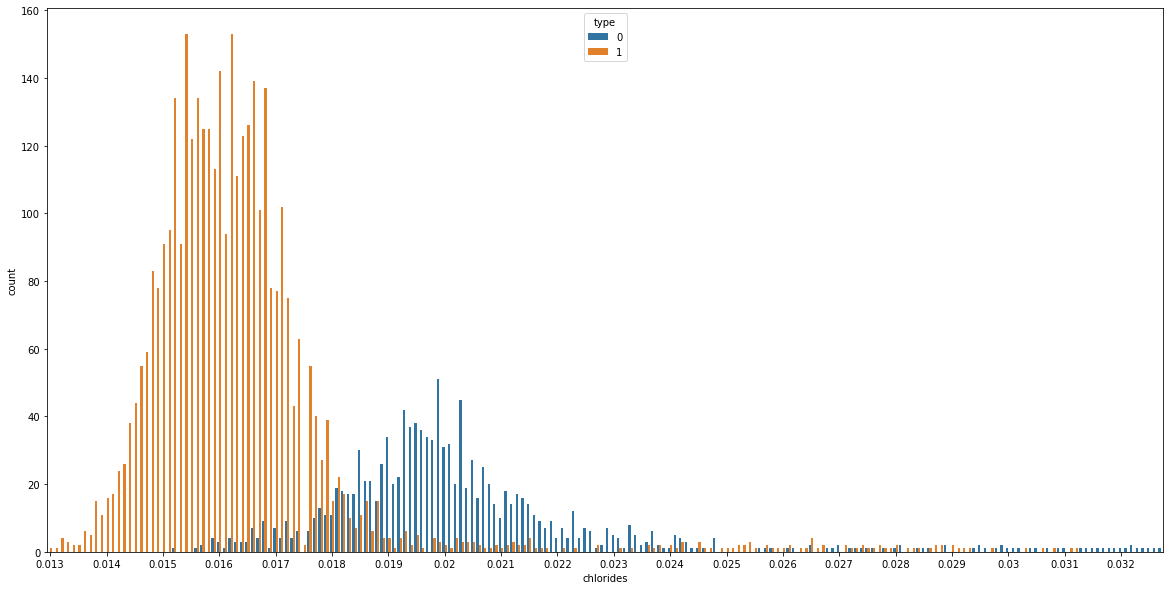

In [6]:
plt.figure(figsize=(20,10))
ax = sns.countplot(X_train['chlorides'], hue=y_train)
labels = [item.get_text() for item in ax.get_xticklabels()]
ax.set_xticklabels([str(round(float(label), 4)) for label in labels])
ax.xaxis.set_major_locator(plt.MaxNLocator(20))

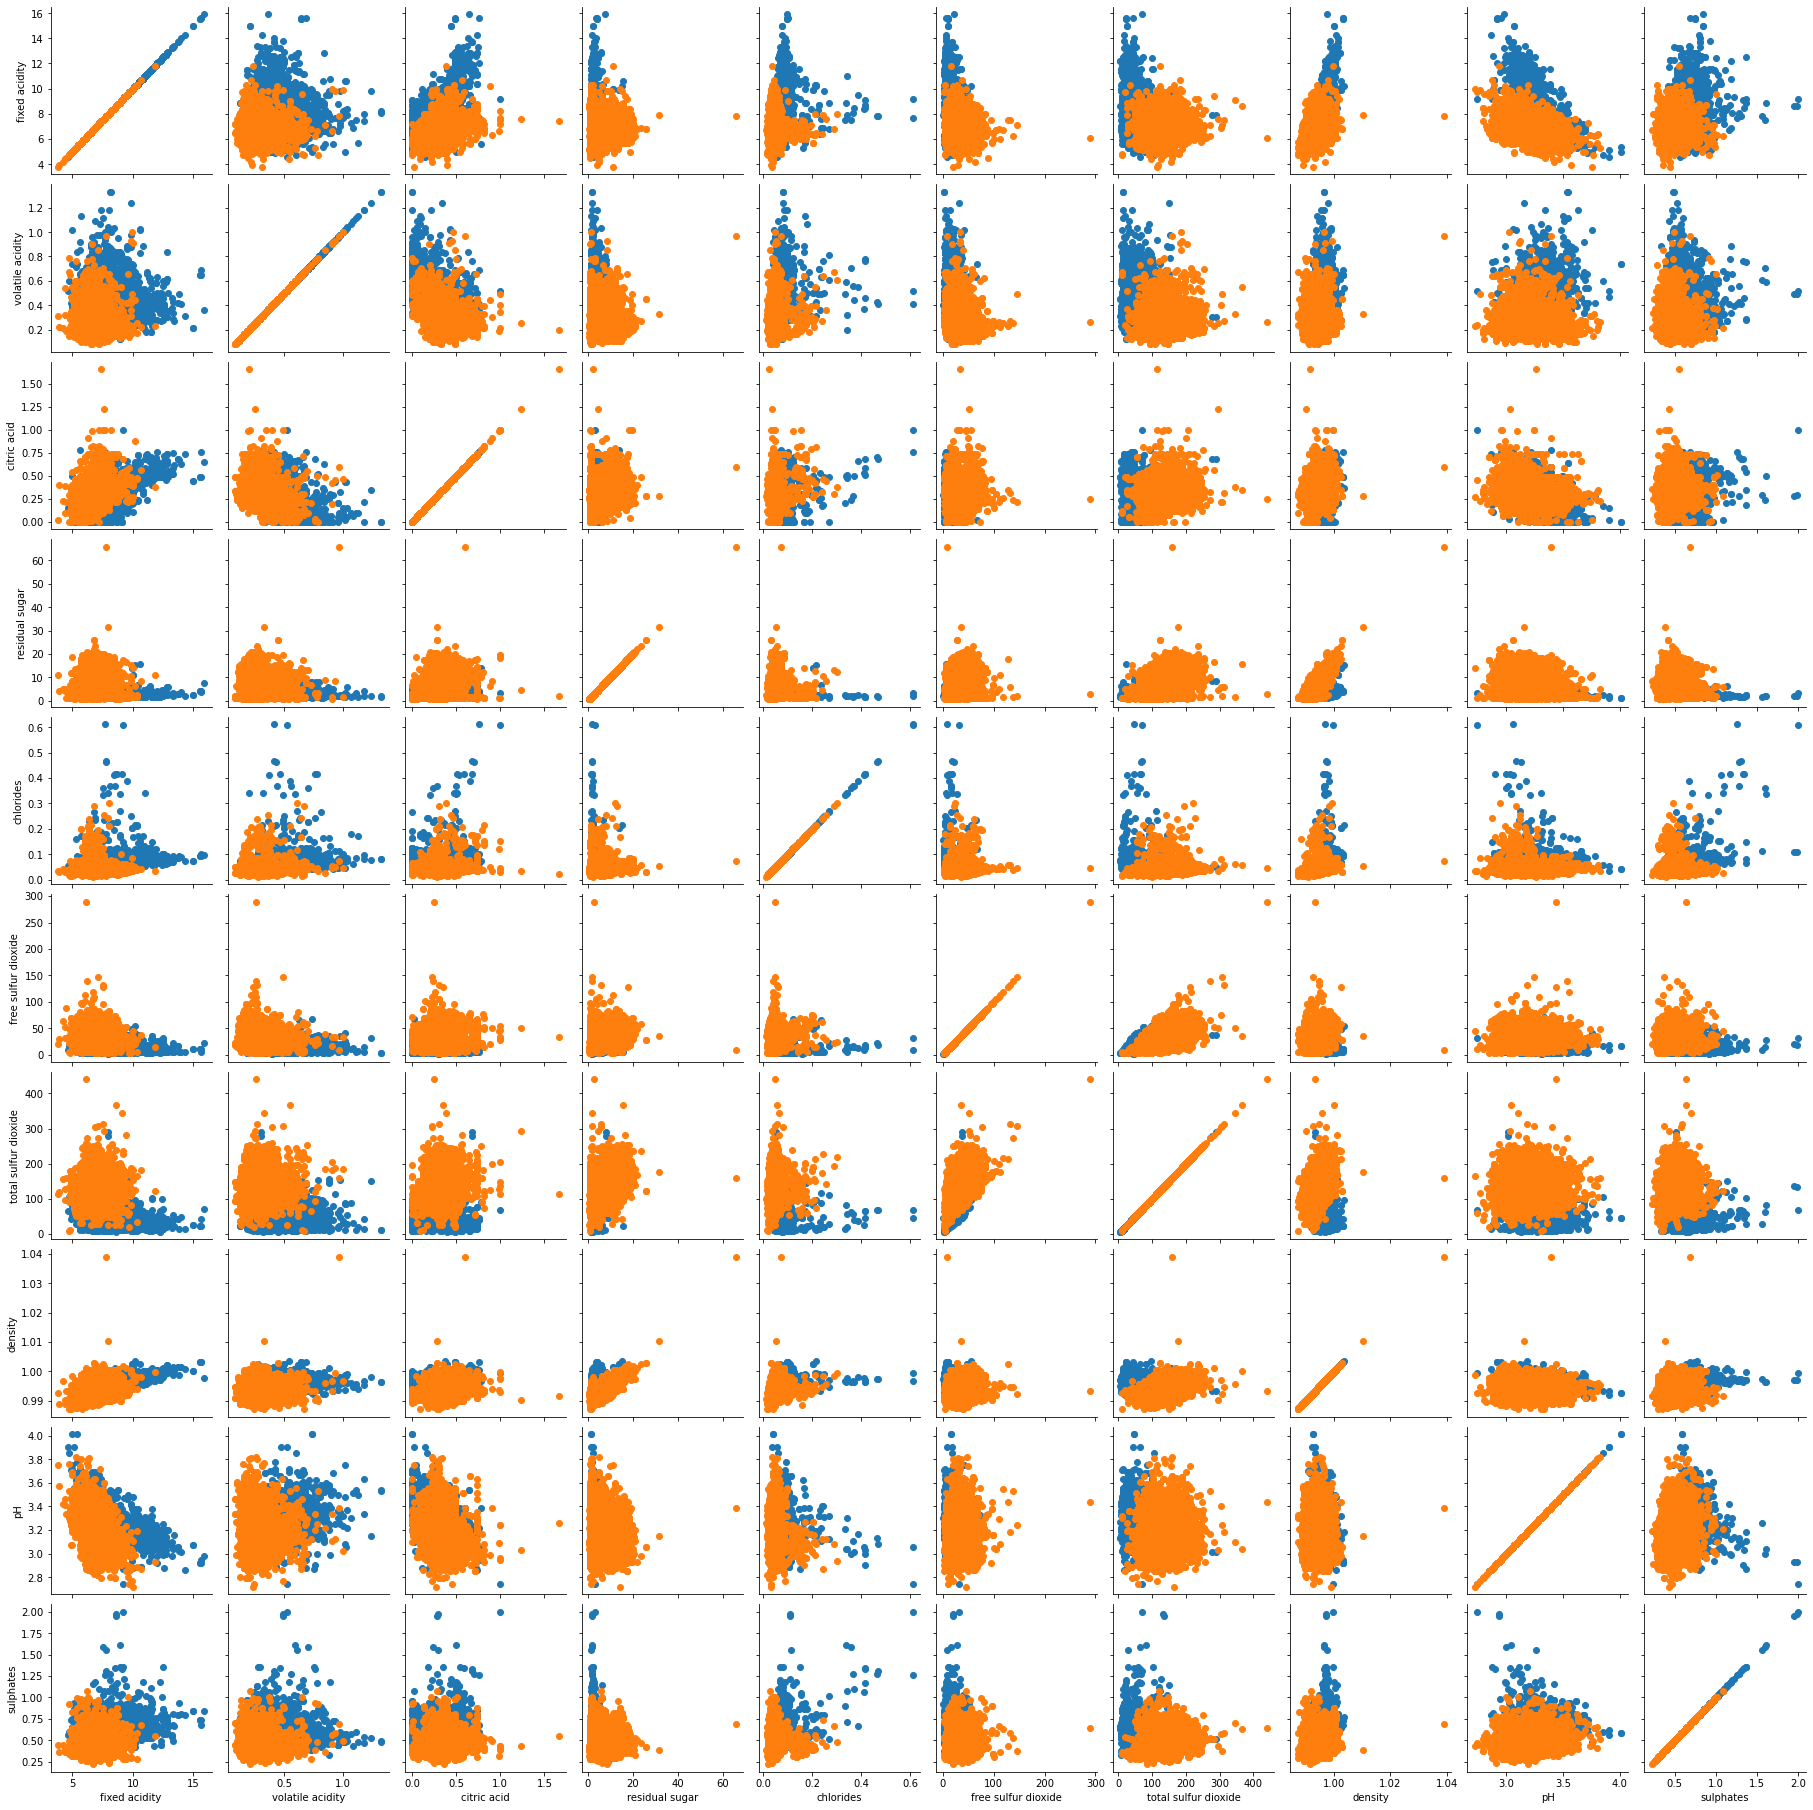

In [7]:
df_for_pairgrid = X_train[['fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates']]
df_for_pairgrid['type'] = y_train

sns.PairGrid(df_for_pairgrid, hue='type').map(plt.scatter)

На графике-скрипке посмотрим на плотность распределения fixed acidity и volatile acidity.


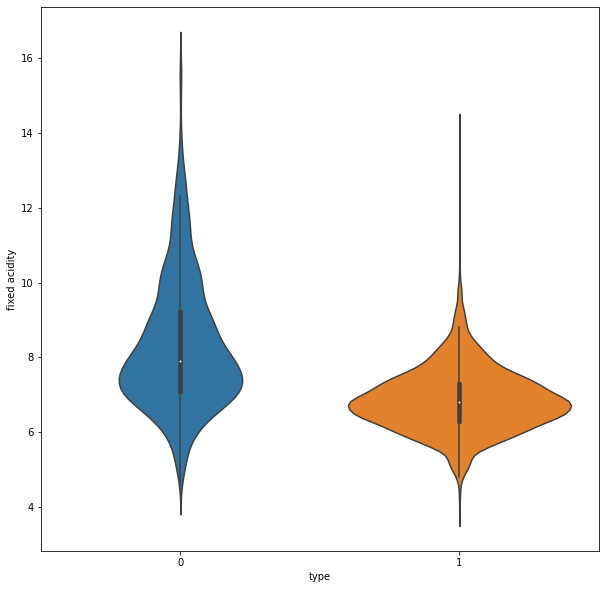

In [8]:
plt.figure(figsize=(10,10))
sns.violinplot(x=y, y=data['fixed acidity'])

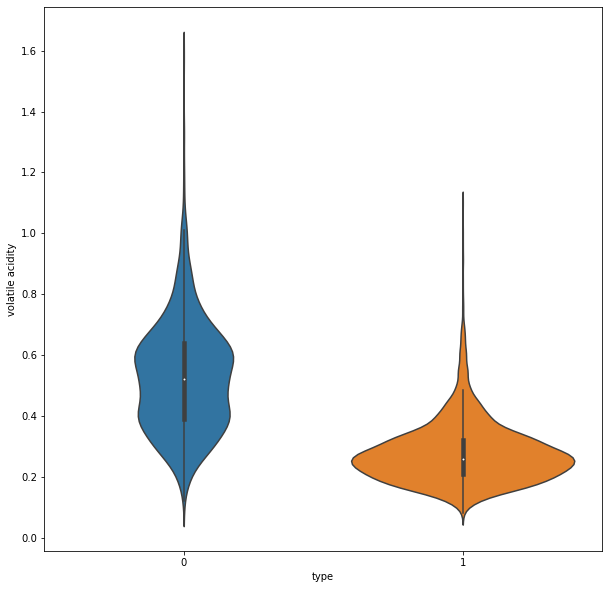

In [9]:
plt.figure(figsize=(10,10))
sns.violinplot(x=y, y=data['volatile acidity'])

## Нормализация признаков

Качество алгоритма до нормализации: 0.9298461538461539
Качество алгоритма после нормализации: 0.9827692307692307


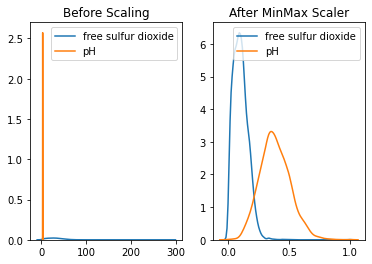

In [10]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier

print("Качество алгоритма до нормализации:",
      KNeighborsClassifier(n_neighbors=2).fit(X_train, y_train).score(X_test, y_test))

scaler = MinMaxScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_train.columns)

print("Качество алгоритма после нормализации:",
      KNeighborsClassifier(n_neighbors=2).fit(X_train_scaled, y_train).score(X_test_scaled, y_test))

# графики
fig, (ax1, ax2) = plt.subplots(ncols=2)
ax1.set_title('Before Scaling')
sns.kdeplot(X_train['free sulfur dioxide'], ax=ax1)
sns.kdeplot(X_train['pH'], ax=ax1)
ax2.set_title('After MinMax Scaler')
sns.kdeplot(X_train_scaled['free sulfur dioxide'], ax=ax2)
sns.kdeplot(X_train_scaled['pH'], ax=ax2)
plt.show()

## Подбор алгоритма

In [11]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

for clf in [DecisionTreeClassifier(), SGDClassifier(), SVC(), GaussianNB(), KNeighborsClassifier()]:
    print(clf.__class__.__name__, clf.fit(X_train_scaled, y_train).score(X_test_scaled, y_test))

DecisionTreeClassifier 0.9833846153846154
SGDClassifier 0.9864615384615385
SVC 0.992
GaussianNB 0.9735384615384616
KNeighborsClassifier 0.9876923076923076


In [12]:
X_train_scaled.drop('total sulfur dioxide', axis='columns', inplace=True)
X_test_scaled.drop('total sulfur dioxide', axis='columns', inplace=True)
X_train_scaled.drop('volatile acidity', axis='columns', inplace=True)
X_test_scaled.drop('volatile acidity', axis='columns', inplace=True)

In [13]:
for clf in [DecisionTreeClassifier(), SGDClassifier(), SVC(), GaussianNB(), KNeighborsClassifier()]:
    print(clf.__class__.__name__, clf.fit(X_train_scaled, y_train).score(X_test_scaled, y_test))

DecisionTreeClassifier 0.9649230769230769
SGDClassifier 0.9661538461538461
SVC 0.9790769230769231
GaussianNB 0.9501538461538461
KNeighborsClassifier 0.9772307692307692


## Стратификация

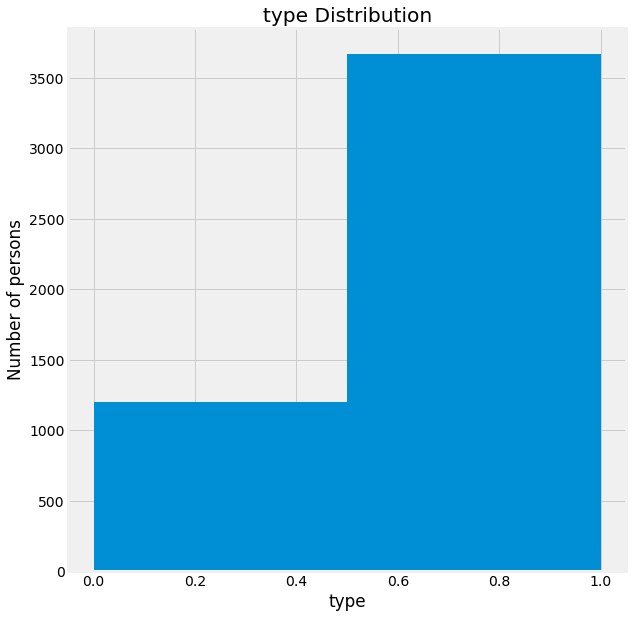

In [14]:
plt.figure(figsize=(10,10))
plt.style.use('fivethirtyeight')
plt.hist(y_train, bins=2);
plt.xlabel('type'); plt.ylabel('Number of persons');
plt.title('type Distribution');

Простой случай: все вина белые

In [15]:
from sklearn.metrics import accuracy_score

a = np.ones(y_test.shape[0])
accuracy_score(y_test, a)

0.7538461538461538

Увеличим количество примеров из недоминантного класса:

In [16]:
X_train_scaled.reset_index(inplace=True, drop=True)
y_train.reset_index(drop=True, inplace=True)

In [17]:
reds = X_train_scaled[y_train == 0]
X_train_strat = pd.concat([X_train_scaled, reds, reds], ignore_index=True)
print(len(y_train))
y_train_strat = pd.concat([y_train, pd.Series(np.zeros(X_train_strat.shape[0]-X_train_scaled.shape[0]))],
                          ignore_index=True)
print(len(y_train_strat))

4872
7270


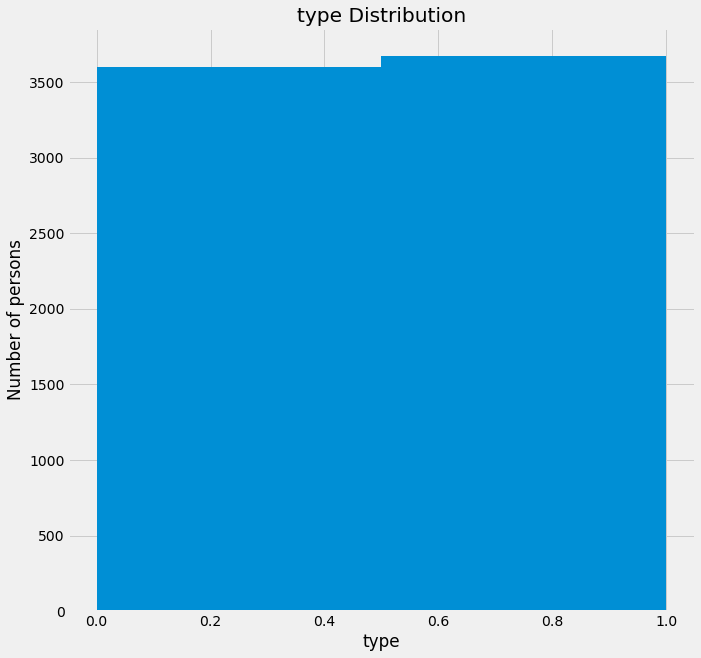

In [18]:
plt.figure(figsize=(10,10))
plt.style.use('fivethirtyeight')
plt.hist(y_train_strat, bins=2);
plt.xlabel('type'); plt.ylabel('Number of persons');
plt.title('type Distribution');

In [19]:
a = np.ones(y_train_strat.shape[0])
accuracy_score(y_train_strat, a)

0.5052269601100413

In [20]:
for clf in [DecisionTreeClassifier(), SGDClassifier(), SVC(), GaussianNB(), KNeighborsClassifier()]:
    print(clf.__class__.__name__, clf.fit(X_train_strat, y_train_strat).score(X_test_scaled, y_test))

DecisionTreeClassifier 0.9692307692307692
SGDClassifier 0.9587692307692308
SVC 0.9778461538461538
GaussianNB 0.947076923076923
KNeighborsClassifier 0.963076923076923


# Метрики качества
Посмотрим на предсказания константного классификатора

In [21]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, precision_recall_curve, roc_auc_score, f1_score, fbeta_score, auc

print("С данными ~ 25% на 75%(красное-белое)")
a = np.ones(y_test.shape[0])
print('\tAccuracy:\t{}'.format(accuracy_score(y_test, a)))
print('\tPrecision:\t{}'.format(precision_score(y_test, a)))
print('\tRecall:\t\t{}'.format(recall_score(y_test, a)))
print('\tROC AUC:\t{}'.format(roc_auc_score(y_test, a)))
pr, rec, _ = precision_recall_curve(y_test, a)
print('\tPRC AUC:\t{}'.format(auc(rec, pr)))
print('\tF1:\t\t{}'.format(f1_score(y_test, a)))
print('\tF0.5:\t\t{}'.format(fbeta_score(y_test, a, beta=0.5)))
print('\tF2:\t\t{}'.format(fbeta_score(y_test, a, beta=2)))

print("С данными ~50% на 50%(красное-белое)")
a = np.ones(y_train_strat.shape[0])
print('\tAccuracy:\t{}'.format(accuracy_score(y_train_strat, a)))
print('\tPrecision:\t{}'.format(precision_score(y_train_strat, a)))
print('\tRecall:\t\t{}'.format(recall_score(y_train_strat, a)))
print('\tROC AUC:\t{}'.format(roc_auc_score(y_train_strat, a)))
pr, rec, _ = precision_recall_curve(y_train_strat, a)
print('\tPRC AUC:\t{}'.format(auc(rec, pr)))
print('\tF1:\t\t{}'.format(f1_score(y_train_strat, a)))
print('\tF0.5:\t\t{}'.format(fbeta_score(y_train_strat, a, beta=0.5)))
print('\tF2:\t\t{}'.format(fbeta_score(y_train_strat, a, beta=2)))

С данными ~ 25% на 75%(красное-белое)
	Accuracy:	0.7538461538461538
	Precision:	0.7538461538461538
	Recall:		1.0
	ROC AUC:	0.5
	PRC AUC:	0.8769230769230769
	F1:		0.8596491228070176
	F0.5:		0.7928802588996764
	F2:		0.9386973180076629
С данными ~50% на 50%(красное-белое)
	Accuracy:	0.5052269601100413
	Precision:	0.5052269601100413
	Recall:		1.0
	ROC AUC:	0.5
	PRC AUC:	0.7526134800550206
	F1:		0.6712967193639771
	F0.5:		0.5607119958477086
	F2:		0.8362171022675531


Так как классы находятся в дисбалансе выберем метрику - ROC AUC